In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# download training data (labeled):
!wget https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/refs/heads/main/data/incidents_train.csv

# load training data:
data = pd.read_csv('incidents_train.csv', index_col=0)
trainset, devset = train_test_split(data, test_size=0.2, random_state=2024)

trainset.sample()

--2024-11-11 17:01:35--  https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/refs/heads/main/data/incidents_train.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8003::154, 2606:50c0:8001::154, 2606:50c0:8000::154, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 12866710 (12M) [text/plain]
Сохранение в: «incidents_train.csv.4»

incidents_train.csv 100%[===================>]  12,27M   900KB/s    за 14s     

2024-11-11 17:01:50 (879 KB/s) - «incidents_train.csv.4» сохранён [12866710/12866710]



,year,month,day,country,title,text,hazard-category,product-category,hazard,product
5014,2021,5,17,us,Kraft Heinz Foods Company Recalls Chef Francis...,018-2021\n\n \n High - Class I\n\n Misbra...,allergens,"soups, broths, sauces and condiments",milk and products thereof,soup


In [18]:
trainset.head()

,year,month,day,country,title,text,hazard-category,product-category,hazard,product
1062,2014,7,30,au,Marvellous Creations Jelly Popping Candy Beani...,Mondelez Australia Pty Ltd has recalled Marvel...,foreign bodies,"cocoa and cocoa preparations, coffee and tea",plastic fragment,chocolate
1969,2016,11,17,us,"Request Foods, Inc. Issues Allergy Alert On Un...","Holland, MI - Request Foods, Inc. is recalling...",allergens,other food product / mixed,eggs and products thereof,pasta products
1053,2014,7,17,uk,"VBites Foods recalls 'Wot, No Dairy?' desserts","VBites Foods is recalling two 'Wot, No Dairy?'...",allergens,ices and desserts,milk and products thereof,desserts
2200,2017,5,1,ca,Toppits brand Battered Blue Cod Fillet recalle...,Food Recall Warning (Allergen) - Toppits brand...,allergens,seafood,milk and products thereof,cod fillets
276,2006,10,6,us,Oct 6_ 2006_ Iowa_ Firm Recalls Ground Beef___,"WASHINGTON, October 6, 2006 - Jims Market and...",biological,"meat, egg and dairy products",escherichia coli,frozen beef patties


In [19]:
print(trainset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4065 entries, 1062 to 3933
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              4065 non-null   int64 
 1   month             4065 non-null   int64 
 2   day               4065 non-null   int64 
 3   country           4065 non-null   object
 4   title             4065 non-null   object
 5   text              4065 non-null   object
 6   hazard-category   4065 non-null   object
 7   product-category  4065 non-null   object
 8   hazard            4065 non-null   object
 9   product           4065 non-null   object
dtypes: int64(3), object(7)
memory usage: 349.3+ KB
None


In [20]:
# количество уникальных значений
print(trainset.nunique())

year                  29
month                 12
day                   31
country                9
title               3986
text                4052
hazard-category       10
product-category      22
hazard               127
product              912
dtype: int64


Распределение категорий опасностей (hazard-category):
allergens                         1491
biological                        1392
foreign bodies                     456
fraud                              293
chemical                           222
other hazard                       105
organoleptic aspects                42
packaging defect                    41
food additives and flavourings      20
migration                            3
Name: hazard-category, dtype: int64

Распределение категорий продуктов (product-category):
meat, egg and dairy products                         1148
cereals and bakery products                           548
fruits and vegetables                                 426
prepared dishes and snacks                            374
seafood                                               217
soups, broths, sauces and condiments                  210
nuts, nut products and seeds                          200
ices and desserts                                     172
c

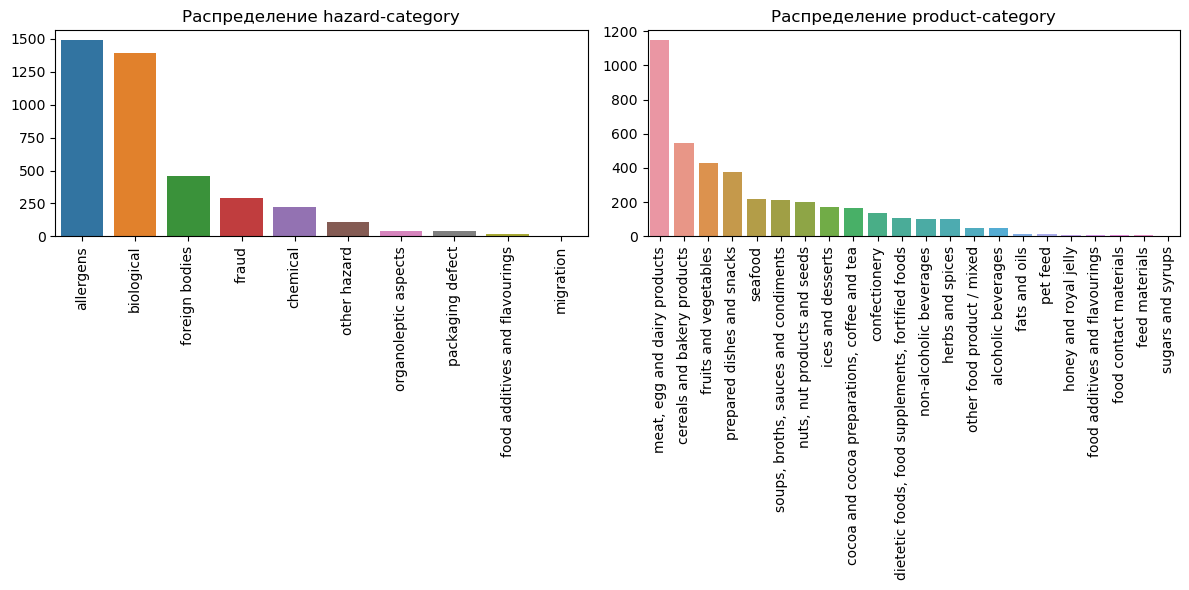

In [7]:
# Анализ сбалансированности классов
# Проверка распределения целевых классов в подзадаче 1 (ST1): hazard-category и product-category
hazard_category_distribution = trainset['hazard-category'].value_counts()
product_category_distribution = trainset['product-category'].value_counts()

# Вывод распределения
print("Распределение категорий опасностей (hazard-category):")
print(hazard_category_distribution)

print("\nРаспределение категорий продуктов (product-category):")
print(product_category_distribution)

# Визуализация распределения классов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# hazard-category
plt.subplot(1, 2, 1)
sns.barplot(x=hazard_category_distribution.index, y=hazard_category_distribution.values)
plt.title('Распр еделение hazard-category')
plt.xticks(rotation=90)

# product-category
plt.subplot(1, 2, 2)
sns.barplot(x=product_category_distribution.index, y=product_category_distribution.values)
plt.title('Распределение product-category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Вывод:** показано распределение категорий опасностей (hazard-category) и продуктов (product-category).
Категории опасностей:
allergens (аллергены) — самая многочисленная категория (1491),
biological (биологическая) — 1392,
foreign bodies (посторонние тела) — 456,
Остальные категории, такие как fraud, chemical, other hazard, имеют меньшее количество записей.
Категории продуктов:
Больше всего записей в категории meat, egg and dairy products (мясо, яйца и молочные продукты) — 1148,
Категории cereals and bakery products и fruits and vegetables содержат 548 и 426 соответственно.
Далее идут такие категории, как prepared dishes and snacks, seafood и другие, в меньших количествах.

Гистограммы показывают визуальное распределение данных. Первая иллюстрирует количество для каждой категории опасностей (аллергены и биологические опасности значительно доминируют). Вторая показывает распределение по категориям продуктов (meat, egg and dairy products имеет наибольшее количество, остальные категории распределены неравномерно.

In [9]:
# Поиск опечаток или некорректной разметки
# Проверка на наличие опечаток и странных символов в заголовках
from collections import Counter
import re

# Преобразуем все заголовки в один текст для анализа
all_titles = ' '.join(trainset['title'].dropna().tolist())

# Разбиваем на слова, используя регулярные выражения для очистки текста от символов
words = re.findall(r'\b\w+\b', all_titles.lower())

# Подсчитываем частоту встречаемости каждого слова
word_counts = Counter(words)

# Выводим 20 самых частотных слов
print("20 самых частотных слов:")
print(word_counts.most_common(20))

# Проверим, есть ли аномальные или странные слова в списке
# Можно отсортировать слова по частоте встречаемости


20 самых частотных слов:
[('to', 1924), ('of', 1836), ('due', 1712), ('recalls', 1470), ('and', 1278), ('undeclared', 1069), ('products', 934), ('possible', 740), ('brand', 708), ('recalled', 698), ('in', 609), ('recall', 608), ('because', 555), ('s', 467), ('milk', 464), ('foods', 435), ('issues', 433), ('ltd', 387), ('inc', 372), ('the', 372)]


In [10]:
 # Анализ, можно ли решить задачу с помощью простых правил
# Пример: предсказание классов по ключевым словам
def simple_rule_based_classification(title):
    if 'milk' in title.lower():
        return 'dairy'
    elif 'peanut' in title.lower():
        return 'allergens'
    else:
        return 'unknown'

trainset['predicted_category'] = trainset['title'].apply(simple_rule_based_classification)

# сколько примеров можно классифицировать таким простым правилом
print(trainset['predicted_category'].value_counts())

# Сравнение предсказания с реальными метками
accuracy_simple_rules = (trainset['predicted_category'] == trainset['product-category']).mean()
print(f"Точность простого правила: {accuracy_simple_rules:.2%}")


unknown      3454
dairy         450
allergens     161
Name: predicted_category, dtype: int64
Точность простого правила: 0.00%


Представлен пример простой классификации на основе ключевых слов в заголовках. Пример использует функции для определения категории по ключевым словам:
Если в заголовке содержится слово "milk", продукт классифицируется как dairy (молочные продукты),
Если слово "peanut", продукт классифицируется как allergens (аллергены),
В противном случае — категория остается unknown.
После применения этих правил: большинство заголовков не попало под правила и осталось как unknown (3454),
450 записей были отнесены к категории dairy (молочные продукты), 161 запись — к категории allergens (аллергены).

Поскольку классификация проводилась на очень простых правилах (по ключевым словам в заголовках), и большая часть данных была классифицирована как unknown, это вполне объясняет настолько низкую точность.

In [11]:
# Поиск пропуска данных 
# Проверим, есть ли пропущенные значения
missing_values = trainset.isnull().sum()
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

# Процент пропусков по каждому столбцу
missing_percent = (trainset.isnull().sum() / len(trainset)) * 100
print("Процент пропущенных значений:")
print(missing_percent)


Количество пропущенных значений в каждом столбце:
year                  0
month                 0
day                   0
country               0
title                 0
text                  0
hazard-category       0
product-category      0
hazard                0
product               0
predicted_category    0
dtype: int64
Процент пропущенных значений:
year                  0.0
month                 0.0
day                   0.0
country               0.0
title                 0.0
text                  0.0
hazard-category       0.0
product-category      0.0
hazard                0.0
product               0.0
predicted_category    0.0
dtype: float64
